In [1]:
# General import
import numpy as np
import os
from PIL import Image
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataGen
from Codes.dataprocess import Export_ep
from Codes.alternate import AlternatingBD
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.display import Display_epd
from Codes.simplex import Simplex
from Codes.fbstep import Energy

# Minimisation alternée

Approche variationnelle pour la reconstruction d'un noyau régulier $K$, minimisation de l'énergie,
$$
E_1(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2
\; .
$$ 
On peut considérer que le noyau appartien a l'ensemble des simplexe (ensemble des noyaux à coefficient positif dont la somme vaut 1).
On sonsidere alors l'énergie
$$
E_1'(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2 + \Sigma(K)
\; .
$$ 


Approche variationnelle pour la reconstruction de l'image $u$, avec régularisation TV,
$$
E_2(u) = \frac{1}{2} \| g - K * u\|^2 +  \mu \text{TV} (u)
\; .
$$

Dans la minimisation alternée, on considere d'abord la minimisation de $E_2$ 
pour reconstruire l'image $u$, puis de $E_1$ (ou éventuellement $E_1'$) pour reconstruire le noyau $K$.

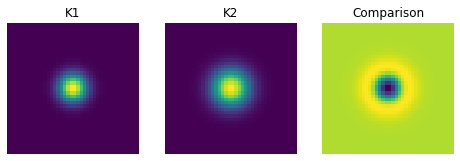

Erreur |K1 - K2|/ |K2| : 0.3500 


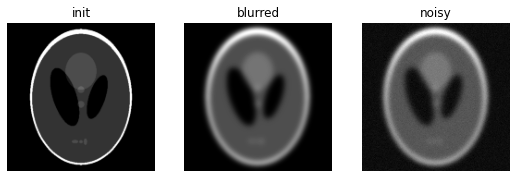

Erreur blurred |x_blurr- x_true|_2 :0.5093
Erreur |x_noisy - x_true|_2 :0.5107


In [2]:
K, K_shift, x_i, x_b, x_o1 = DataGen()

### Initialisation juste - bruit 5%

In [3]:
alpha = 100
mu    = 0.001
K_in  = K.copy()
x_in  = x_o1
K_out,x_out,Ep11,Ed11 = AlternatingBD(K_in,x_in,x_o1,alpha,mu,\
                  alte=4,niter_TV=1500,niter_Lap=1500,\
                  proj_simplex=True)

------------- min image -----------------
iteration 0 %--- gradient K 1032.7658 --- gradient x 2.6315
iteration 500 %--- gradient K 652.5549 --- gradient x 0.5641
iteration 1000 %--- gradient K 479.6555 --- gradient x 0.3938
iteration 1500 %--- gradient K 401.1315 --- gradient x 0.3219
iteration 2000 %--- gradient K 356.2726 --- gradient x 0.2825
iteration 2500 %--- gradient K 326.0339 --- gradient x 0.2570
------------- min kernel -----------------
iteration 3000 %--- gradient K 304.4642 --- gradient x 0.2389
iteration 3500 %--- gradient K 301.5320 --- gradient x 0.2167
iteration 4000 %--- gradient K 301.4453 --- gradient x 0.2152
------------- min image -----------------
iteration 4500 %--- gradient K 297.8609 --- gradient x 0.2139
iteration 5000 %--- gradient K 225.4358 --- gradient x 0.1761
iteration 5500 %--- gradient K 229.7459 --- gradient x 0.1775
iteration 6000 %--- gradient K 227.9482 --- gradient x 0.1755
iteration 6500 %--- gradient K 224.3814 --- gradient x 0.1727
iteratio

In [4]:
Export_ep(Ep11,label='1',cas='1')

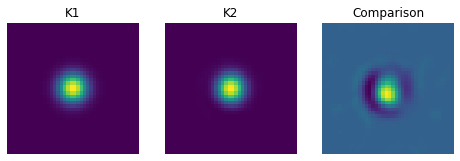

Erreur |K1 - K2|/ |K2| : 0.0718 


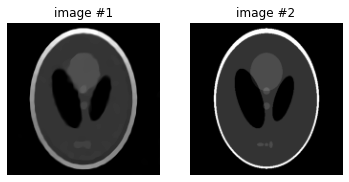

Erreur |im1 - im2|/|im2| :0.3388


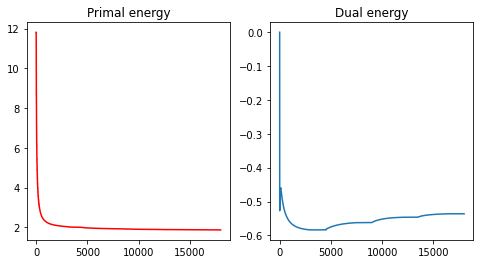

In [5]:
Display_ker(K_out,K_in,mysize=(8,4))
Display_im(x_out,x_i,mysize=(6,3))
Display_epd(Ep11,Ed11)

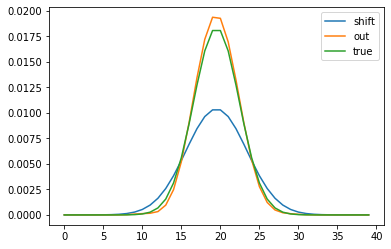

In [6]:
from Codes.simplex import Simplex
plt.plot(K_shift[20,:],label='shift')
plt.plot(K_out[20,:],label='out')
plt.plot(K[20,:],label='true')
plt.legend()

### Initialisation noyau proche - pas de bruit

In [7]:
alpha = 100
mu    = 0.001
K_in  = K_shift.copy()
x_in  = x_b
K_out,x_out,Ep12,Ed12 = AlternatingBD(K_in,x_in,x_o1,alpha,mu,\
                  alte=4,niter_TV=1500,niter_Lap=1500,\
                  proj_simplex=True)

------------- min image -----------------
iteration 0 %--- gradient K 850.0528 --- gradient x 2.8340
iteration 500 %--- gradient K 1866.2656 --- gradient x 1.3258
iteration 1000 %--- gradient K 1664.3407 --- gradient x 1.1582
iteration 1500 %--- gradient K 1566.6653 --- gradient x 1.0812
iteration 2000 %--- gradient K 1508.2680 --- gradient x 1.0364
iteration 2500 %--- gradient K 1470.4957 --- gradient x 1.0075
------------- min kernel -----------------
iteration 3000 %--- gradient K 1445.7344 --- gradient x 0.9888
iteration 3500 %--- gradient K 1415.7945 --- gradient x 0.8430
iteration 4000 %--- gradient K 1414.9010 --- gradient x 0.8482
------------- min image -----------------
iteration 4500 %--- gradient K 1396.6428 --- gradient x 0.8438
iteration 5000 %--- gradient K 1028.8532 --- gradient x 0.6724
iteration 5500 %--- gradient K 1071.8661 --- gradient x 0.6972
iteration 6000 %--- gradient K 1095.1750 --- gradient x 0.7111
iteration 6500 %--- gradient K 1107.1344 --- gradient x 0.7

In [8]:
Export_ep(Ep12,label='1',cas='2')

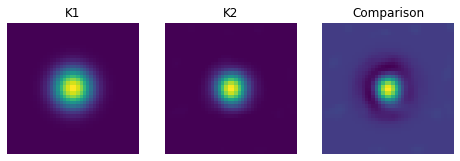

Erreur |K1 - K2|/ |K2| : 0.3287 


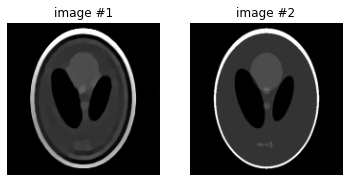

Erreur |im1 - im2|/|im2| :0.3585


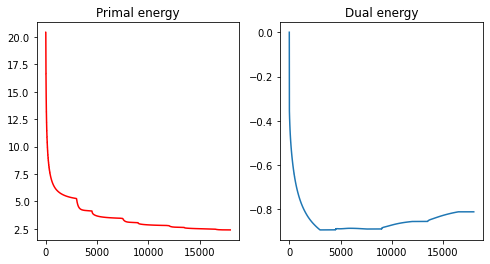

In [10]:
Display_ker(K_out,K_in,mysize=(8,4))
Display_im(x_out,x_i,mysize=(6,3))
Display_epd(Ep12,Ed12)

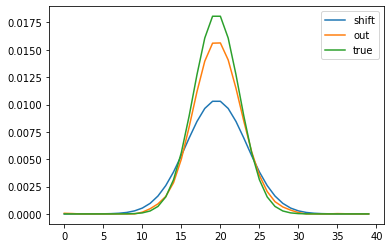

In [12]:
from Codes.simplex import Simplex
plt.plot(K_shift[20,:],label='shift')
plt.plot(K_out[20,:],label='out')
plt.plot(K[20,:],label='true')
plt.legend()

### Initialisation proche - bruit 1%

In [13]:
alpha = 100
mu    = 0.001
K_in  = K_shift.copy()
x_in  = x_o1
K_out,x_out,Ep13,Ed13 = AlternatingBD(K_in,x_in,x_o1,alpha,mu,\
                  alte=4,niter_TV=1500,niter_Lap=1500,\
                  proj_simplex=True)

------------- min image -----------------
iteration 0 %--- gradient K 1233.1297 --- gradient x 2.9271
iteration 500 %--- gradient K 1866.9158 --- gradient x 1.3301
iteration 1000 %--- gradient K 1664.5555 --- gradient x 1.1625
iteration 1500 %--- gradient K 1565.3062 --- gradient x 1.0854
iteration 2000 %--- gradient K 1508.0775 --- gradient x 1.0411
iteration 2500 %--- gradient K 1470.7902 --- gradient x 1.0126
------------- min kernel -----------------
iteration 3000 %--- gradient K 1445.5791 --- gradient x 0.9938
iteration 3500 %--- gradient K 1415.6363 --- gradient x 0.8489
iteration 4000 %--- gradient K 1414.7441 --- gradient x 0.8542
------------- min image -----------------
iteration 4500 %--- gradient K 1396.5043 --- gradient x 0.8498
iteration 5000 %--- gradient K 1028.8602 --- gradient x 0.6800
iteration 5500 %--- gradient K 1071.8289 --- gradient x 0.7046
iteration 6000 %--- gradient K 1095.2891 --- gradient x 0.7184
iteration 6500 %--- gradient K 1107.2099 --- gradient x 0.

In [14]:
Export_ep(Ep13,label='1',cas='3')

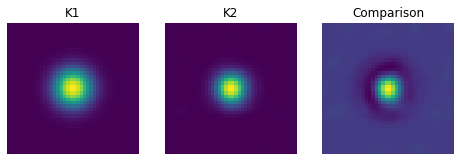

Erreur |K1 - K2|/ |K2| : 0.3287 


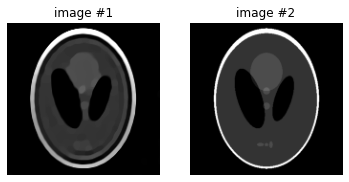

Erreur |im1 - im2|/|im2| :0.3584


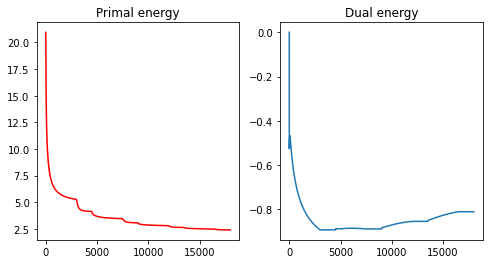

In [16]:
Display_ker(K_out,K_in,mysize=(8,4))
Display_im(x_out,x_i,mysize=(6,3))
Display_epd(Ep13,Ed13)

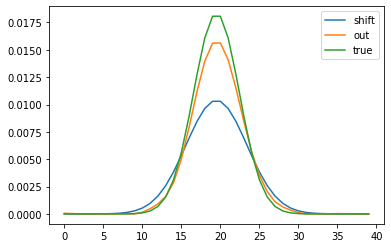

In [18]:
from Codes.simplex import Simplex
plt.plot(K_shift[20,:],label='shift')
plt.plot(K_out[20,:],label='out')
plt.plot(K[20,:],label='true')
plt.legend()

# ANNEXES

In [ ]:
sys.exit()

### Initialisation proche - bruit 1% - projection sur le simplex

In [ ]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.15, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

In [ ]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")

In [ ]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))

### Initialisation lointaine, bruit 1%, proj sur simplex

In [ ]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.4, 0.1
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

In [ ]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")

In [ ]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))